<a href="https://colab.research.google.com/github/Antonio-Villarreal/Deep-Learning-For-Dummies/blob/main/VGG16_Adaptations_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG16 Adaptation

Adapts the VGG16 architecture for a smaller image size - 244 x 244

In [33]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

# load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [35]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [36]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model 1

In [37]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()

# Layer 1: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))

# Layer 2: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

# Layer 3: Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4: Convolutional layer with 128 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 5: Convolutional layer with 128 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

# Layer 6: Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 7: Convolutional layer with 256 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 8: Convolutional layer with 256 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 9: Convolutional layer with 256 filters, kernel size of 3x3, and 'same' padding
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

# Layer 10: Max pooling layer with pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 11: Flatten layer to convert the 3D feature maps to 1D feature vectors
model.add(Flatten())

# Layer 12: Fully connected layer with 512 units and 'relu' activation
model.add(Dense(512, activation='relu'))

# Layer 13: Fully connected layer with 512 units and 'relu' activation
model.add(Dense(512, activation='relu'))

# Layer 14: Output layer with 'softmax' activation for multi-class classification
model.add(Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 128)      

## Model 2

In [39]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model2 = Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
model2.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))

# Layer 2: Max pooling layer with pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 4: Max pooling layer with pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5: Flatten layer to convert the 3D feature maps to 1D feature vectors
model2.add(Flatten())

# Layer 6: Fully connected layer with 128 units and 'relu' activation
model2.add(Dense(128, activation='relu'))

# Layer 7: Output layer with 'softmax' activation for multi-class classification
model2.add(Dense(10, activation='softmax'))

In [40]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_13 (Dense)            (None, 128)              

## Model 3

In [41]:
model3 = Sequential()

# Layer 1: Convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 2: Convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 3: Max pooling layer with pool size of 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 5: Convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 6: Max pooling layer with pool size of 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 7: Convolutional layer with 128 filters, kernel size of 3x3, and 'same' padding
model3.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 8: Flatten layer to convert the 3D feature maps to 1D feature vectors
model3.add(Flatten())

# Layer 9: Fully connected layer with 512 units and 'relu' activation
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 10: Fully connected layer with 512 units and 'relu' activation
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# Layer 11: Output layer with 'softmax' activation for multi-class classification
model3.add(Dense(10, activation='softmax'))

In [42]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_14 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)       

## Model 4 (Imported)

In [43]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

# base_model = VGG16(include_top=False, input_shape=(32,32,3))
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

In [44]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [45]:
# Add new layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [46]:
from keras.models import Model
model4 = Model(inputs=base_model.input, outputs=predictions)

In [47]:
model4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

## Training

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 17s 20ms/step - loss: 1.3442 - accuracy: 0.5210 - val_loss: 1.5771 - val_accuracy: 0.4899
Epoch 2/10
782/782 [==============================] - 15s 20ms/step - loss: 0.8421 - accuracy: 0.7045 - val_loss: 1.3995 - val_accuracy: 0.5805
Epoch 3/10
782/782 [==============================] - 15s 19ms/step - loss: 0.6617 - accuracy: 0.7696 - val_loss: 0.9123 - val_accuracy: 0.7055
Epoch 4/10
782/782 [==============================] - 15s 20ms/step - loss: 0.5374 - accuracy: 0.8124 - val_loss: 0.7410 - val_accuracy: 0.7591
Epoch 5/10
782/782 [==============================] - 15s 19ms/step - loss: 0.4376 - accuracy: 0.8484 - val_loss: 0.7721 - val_accuracy: 0.7479
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.3500 - accuracy: 0.8781 - val_loss: 0.7150 - val_accuracy: 0.7820
Epoch 7/10
782/782 [==============================] - 15s 20ms/step - loss: 0.2807 - accuracy: 0.9016 - val_loss: 0.7355 - val_accuracy:

In [53]:
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 1.3943 - accuracy: 0.5028 - val_loss: 1.1237 - val_accuracy: 0.6001
Epoch 2/10
782/782 [==============================] - 4s 4ms/step - loss: 1.0301 - accuracy: 0.6360 - val_loss: 0.9748 - val_accuracy: 0.6560
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8884 - accuracy: 0.6900 - val_loss: 0.9098 - val_accuracy: 0.6879
Epoch 4/10
782/782 [==============================] - 4s 4ms/step - loss: 0.7958 - accuracy: 0.7246 - val_loss: 0.9125 - val_accuracy: 0.6919
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.7077 - accuracy: 0.7537 - val_loss: 0.8803 - val_accuracy: 0.6978
Epoch 6/10
782/782 [==============================] - 4s 4ms/step - loss: 0.6414 - accuracy: 0.7754 - val_loss: 0.8933 - val_accuracy: 0.6972
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.5716 - accuracy: 0.7983 - val_loss: 0.8752 - val_accuracy: 0.7142
Epoch 

In [54]:
history3 = model3.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 11s 13ms/step - loss: 1.4526 - accuracy: 0.4995 - val_loss: 1.3272 - val_accuracy: 0.5705
Epoch 2/10
782/782 [==============================] - 10s 12ms/step - loss: 0.9168 - accuracy: 0.6780 - val_loss: 0.9394 - val_accuracy: 0.6875
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.7319 - accuracy: 0.7441 - val_loss: 0.8726 - val_accuracy: 0.7127
Epoch 4/10
782/782 [==============================] - 10s 12ms/step - loss: 0.6154 - accuracy: 0.7841 - val_loss: 0.8797 - val_accuracy: 0.7227
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 0.5284 - accuracy: 0.8152 - val_loss: 0.8957 - val_accuracy: 0.7150
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.4551 - accuracy: 0.8397 - val_loss: 1.2502 - val_accuracy: 0.6554
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 0.3913 - accuracy: 0.8628 - val_loss: 0.6956 - val_accuracy: 

In [55]:
history4 = model4.fit(x_train, y_train, batch_size=64, epochs=Epoch, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 13s 16ms/step - loss: 1.3149 - accuracy: 0.5357 - val_loss: 1.2346 - val_accuracy: 0.5626
Epoch 2/10
782/782 [==============================] - 12s 16ms/step - loss: 1.1392 - accuracy: 0.6005 - val_loss: 1.1690 - val_accuracy: 0.5896
Epoch 3/10
782/782 [==============================] - 12s 15ms/step - loss: 1.0580 - accuracy: 0.6260 - val_loss: 1.1570 - val_accuracy: 0.5926
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.9883 - accuracy: 0.6499 - val_loss: 1.1321 - val_accuracy: 0.6005
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.9274 - accuracy: 0.6724 - val_loss: 1.1237 - val_accuracy: 0.6103
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.8705 - accuracy: 0.6902 - val_loss: 1.1068 - val_accuracy: 0.6166
Epoch 7/10
782/782 [==============================] - 12s 15ms/step - loss: 0.8150 - accuracy: 0.7110 - val_loss: 1.1224 - val_accuracy:

# Analytics

In [56]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [57]:
test_loss4, test_acc4 = model4.evaluate(x_test, y_test, verbose=0)
test_loss3, test_acc3 = model3.evaluate(x_test, y_test, verbose=0)
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Testing Loss Model 1:", test_loss)
print("Testing Accuracy Model 1:", test_acc)
print("Testing Loss Model 2:", test_loss2)
print("Testing Accuracy Model 2:", test_acc2)
print("Testing Loss Model 3:", test_loss3)
print("Testing Accuracy Model 3:", test_acc3)
print("Testing Loss Model 4:", test_loss4)
print("Testing Accuracy Model 4:", test_acc4)

Testing Loss Model 1: 0.8845560550689697
Testing Accuracy Model 1: 0.7797999978065491
Testing Loss Model 2: 0.9695953130722046
Testing Accuracy Model 2: 0.7081000208854675
Testing Loss Model 3: 0.8852334022521973
Testing Accuracy Model 3: 0.7649999856948853
Testing Loss Model 4: 1.1854816675186157
Testing Accuracy Model 4: 0.623199999332428


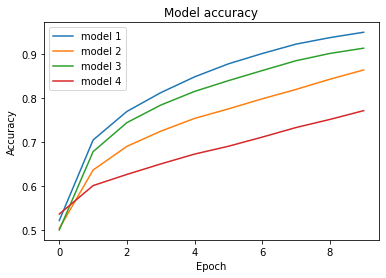

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="model 1")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.show()

model2, = plt.plot(history2.history['accuracy'], label="model 2")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.show()

plt.plot(history3.history['accuracy'], label="model 3")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.show()

plt.plot(history4.history['accuracy'], label="model 4")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
leg = plt.legend(loc='upper left')
plt.show()